<a href="https://colab.research.google.com/github/joelma78/colab-github-actions/blob/main/Semente2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://cli.github.com/packages stable/main amd64 Packages [354 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,627 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,600 kB]
Get:14 https://p

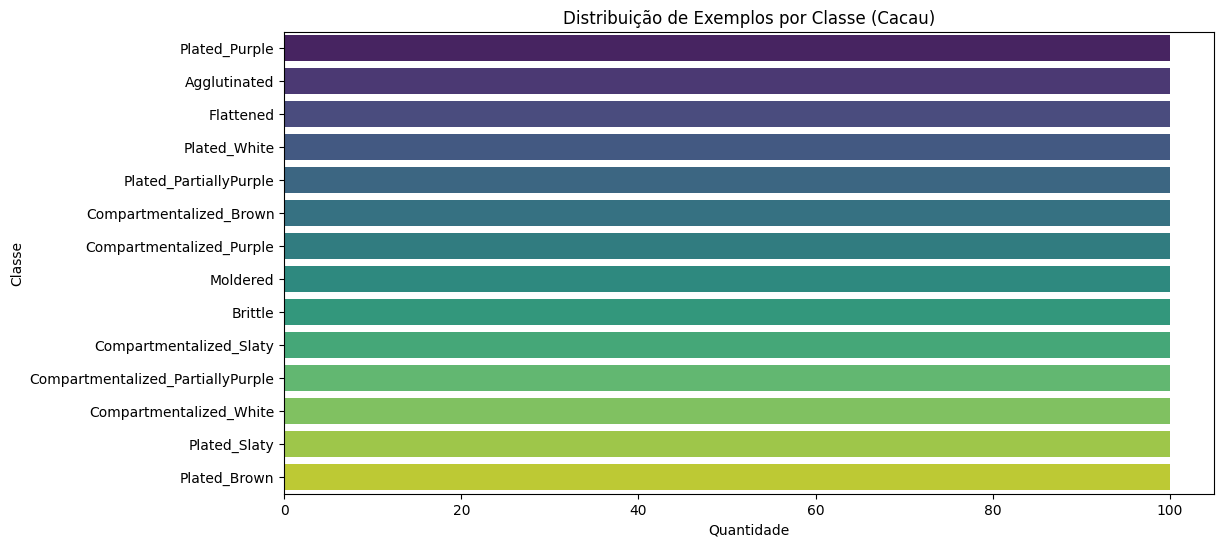

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Install unrar if not already installed
!apt-get update && apt-get install -y unrar

# Descompactar o arquivo .rar
# Certifique-se de que o caminho do arquivo .rar está correto
# e que ele será descompactado para a pasta onde o script espera encontrá-lo.
rar_file_path = "/content/framed_and_centralized_-_version_4_-_method_b.rar"
extraction_dir_name = "Enquadrado e Centralizado - Versão 4 - Método B" # Corrigido para o nome real extraído
extraction_path = "/content/" # Extrai para o diretório /content/

# Check if the .rar file exists before attempting to unrar
if os.path.exists(rar_file_path):
    print(f"Descompactando {rar_file_path} para {extraction_path}...")
    # Use -o+ to overwrite existing files without prompting
    !unrar x -o+ {rar_file_path} {extraction_path}
    print("Descompactação concluída.")
else:
    print(f"Arquivo .rar não encontrado em: {rar_file_path}. Verifique o caminho.")

# Caminho para a pasta onde você extraiu as imagens
# Agora usando o caminho absoluto para o diretório descompactado
data_dir = os.path.join(extraction_path, extraction_dir_name)

# Contagem de imagens por pasta (classe)
class_counts = {}
if os.path.isdir(data_dir): # Check if data_dir exists after extraction
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
else:
    print(f"O diretório de dados '{data_dir}' não foi encontrado após a descompactação.")

# Criando um DataFrame para facilitar a plotagem
if class_counts: # Only proceed if class_counts is not empty
    df_dist = pd.DataFrame(list(class_counts.items()), columns=['Classe', 'Quantidade'])

    # Plotagem do gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_dist, x='Quantidade', y='Classe', hue='Classe', palette='viridis', legend=False)
    plt.title('Distribuição de Exemplos por Classe (Cacau)')
    plt.show()
else:
    print("Nenhuma contagem de classe para plotar.")

In [2]:
from PIL import Image

# Pegar uma imagem de exemplo de qualquer classe
sample_class = os.listdir(data_dir)[0]
sample_img_name = os.listdir(os.path.join(data_dir, sample_class))[0]
img_path = os.path.join(data_dir, sample_class, sample_img_name)

with Image.open(img_path) as img:
    print(f"Formato da imagem: {img.format}") # Esperado: JPEG
    print(f"Dimensões originais: {img.size}") # Largura x Altura
    print(f"Modo de cor: {img.mode}")         # Esperado: RGB para EfficientNet

Formato da imagem: JPEG
Dimensões originais: (3011, 2851)
Modo de cor: RGB


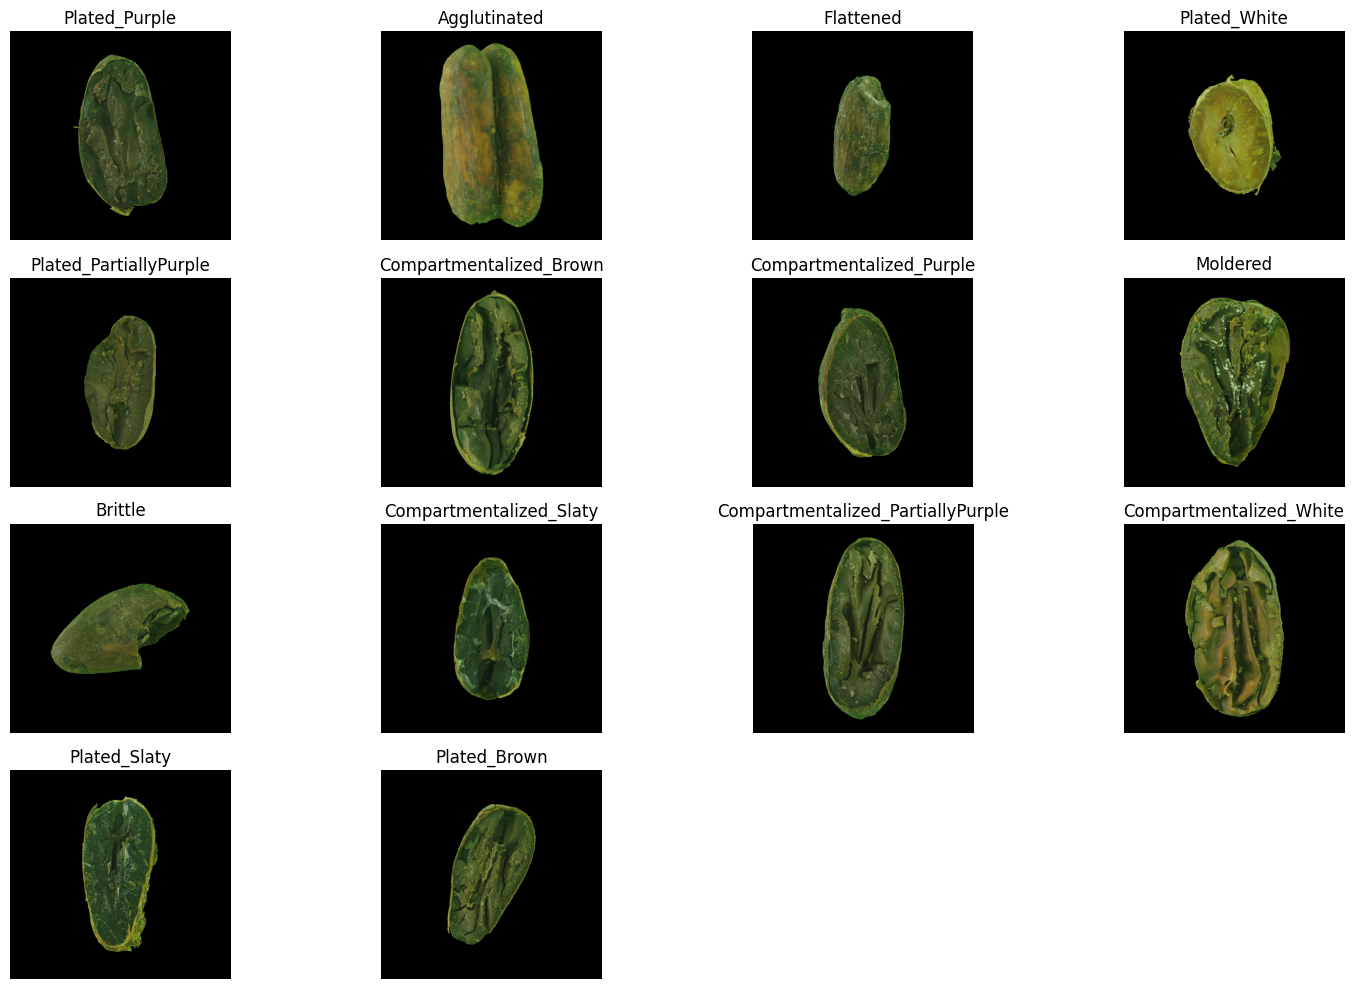

In [3]:
import matplotlib.image as mpimg

def plot_samples_per_class(root_dir, n_samples=1):
    classes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    plt.figure(figsize=(15, 10))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(root_dir, class_name)
        # Ensure the class directory is not empty before trying to list its contents
        if not os.listdir(class_path):
            print(f"Warning: Class directory '{class_name}' is empty. Skipping.")
            continue
        img_name = os.listdir(class_path)[0]
        img = mpimg.imread(os.path.join(class_path, img_name))

        plt.subplot(4, 4, i + 1) # Ajustado para as 14 classes
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples_per_class(data_dir)

In [4]:
import os
import pandas as pd

# 1. Defina onde as imagens estão
data_dir = '/content/Enquadrado e Centralizado - Versão 4 - Método B' # Nome da pasta que criamos no Marco 1

# 2. Criar listas para armazenar os caminhos e os nomes das classes
caminhos_imagens = []
nomes_classes = []

# Varre cada pasta de classe
for classe in os.listdir(data_dir):
    caminho_classe = os.path.join(data_dir, classe)

    # Verifica se é realmente uma pasta
    if os.path.isdir(caminho_classe):
        for img_nome in os.listdir(caminho_classe):
            caminhos_imagens.append(os.path.join(caminho_classe, img_nome))
            nomes_classes.append(classe)

# Criar um DataFrame para facilitar a organização
df = pd.DataFrame({
    'caminho': caminhos_imagens,
    'classe': nomes_classes
})

print(f"Total de imagens encontradas: {len(df)}") # Deve ser 1.400

Total de imagens encontradas: 1400


In [5]:
import os

data_dir = '/content/Enquadrado e Centralizado - Versão 4 - Método B'

if os.path.exists(data_dir):
    print(f"Conteúdo de '{data_dir}':")
    for item in os.listdir(data_dir):
        item_path = os.path.join(data_dir, item)
        if os.path.isdir(item_path):
            print(f"  [DIR] {item}")
        elif os.path.isfile(item_path):
            print(f"  [FILE] {item}")
else:
    print(f"O diretório '{data_dir}' não foi encontrado.")

Conteúdo de '/content/Enquadrado e Centralizado - Versão 4 - Método B':
  [DIR] Plated_Purple
  [DIR] Agglutinated
  [DIR] Flattened
  [DIR] Plated_White
  [FILE] desktop.ini
  [DIR] Plated_PartiallyPurple
  [DIR] Compartmentalized_Brown
  [DIR] Compartmentalized_Purple
  [DIR] Moldered
  [DIR] Brittle
  [DIR] Compartmentalized_Slaty
  [DIR] Compartmentalized_PartiallyPurple
  [DIR] Compartmentalized_White
  [DIR] Plated_Slaty
  [DIR] Plated_Brown


In [6]:
from sklearn.model_selection import train_test_split

# 3. Dividir os dados
# random_state=42 garante que a divisão seja SEMPRE a mesma para toda a equipe
# stratify=df['classe'] garante que o treino e o teste tenham a mesma proporção de cada tipo de semente
df_treino, df_teste = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df['classe']
)

print(f"Imagens de Treino: {len(df_treino)}")
print(f"Imagens de Teste: {len(df_teste)}")

Imagens de Treino: 1120
Imagens de Teste: 280


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre
import numpy as np

# 1. Definir os modelos extratores (Todos com pesos fixos) [cite: 91, 92]
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
inc_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=(299, 299, 3))
eff_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

def extrair_super_vetor(caminho_img):
    # Carregar imagem original
    img_raw = tf.io.read_file(caminho_img)
    img_raw = tf.image.decode_jpeg(img_raw, channels=3)

    # Processar para VGG16 (224x224) [cite: 82]
    img_vgg = vgg_pre(tf.image.resize(img_raw, [224, 224]))
    feat_vgg = vgg_model.predict(np.expand_dims(img_vgg, 0), verbose=0)

    # Processar para InceptionV3 (299x299) [cite: 82]
    img_inc = inc_pre(tf.image.resize(img_raw, [299, 299]))
    feat_inc = inc_model.predict(np.expand_dims(img_inc, 0), verbose=0)

    # Processar para EfficientNetB0 (224x224) [cite: 82]
    img_eff = eff_pre(tf.image.resize(img_raw, [224, 224]))
    feat_eff = eff_model.predict(np.expand_dims(img_eff, 0), verbose=0)

    # CONCATENAR (O "Pulo do Gato"): Unimos os 3 vetores em um só [cite: 96, 98]
    return np.concatenate([feat_vgg.flatten(), feat_inc.flatten(), feat_eff.flatten()])

# Execute este loop para todo o seu conjunto de treino e teste
# X_train_fusion conterá a inteligência combinada das 3 redes.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
import time

# Preparando X_train e y_train
print("Extraindo características para o conjunto de TREINO...")
start_time = time.time()
X_train_fusion = np.array([extrair_super_vetor(img_path) for img_path in df_treino['caminho']])
y_train = df_treino['classe'].values
end_time = time.time()
tempo_fusion_treino = end_time - start_time
print(f"Extração de TREINO concluída em {tempo_fusion_treino:.2f} segundos.")

# Preparando X_test e y_test
print("Extraindo características para o conjunto de TESTE...")
start_time = time.time()
X_test_fusion = np.array([extrair_super_vetor(img_path) for img_path in df_teste['caminho']])
y_test = df_teste['classe'].values
end_time = time.time()
tempo_fusion_teste = end_time - start_time
print(f"Extração de TESTE concluída em {tempo_fusion_teste:.2f} segundos.")

print(f"Formato de X_train_fusion: {X_train_fusion.shape}")
print(f"Formato de X_test_fusion: {X_test_fusion.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

Extraindo características para o conjunto de TREINO...
Extração de TREINO concluída em 1474.62 segundos.
Extraindo características para o conjunto de TESTE...
Extração de TESTE concluída em 371.76 segundos.
Formato de X_train_fusion: (1120, 3840)
Formato de X_test_fusion: (280, 3840)
Formato de y_train: (1120,)
Formato de y_test: (280,)


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1. Padronização é OBRIGATÓRIA aqui [cite: 79]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fusion)
X_test_scaled = scaler.transform(X_test_fusion)

# 2. PCA para manter 95% da variância [cite: 107, 124]
pca = PCA(n_components=0.95, whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Busca em Grade para a "Super SVM" [cite: 103, 110]
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # O RBF costuma ser o melhor para alta dimensão [cite: 100, 101]
}

grid = GridSearchCV(SVC(probability=True, class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_pca, y_train)

print(f"Melhor Acurácia de Validação: {grid.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ......................C=0.1, gamma=0.01


--- TABELA 1: DESEMPENHO DOS MODELOS ---


,Modelo,Acurácia,Precisão,Revocação,F1-Score,Tempo Treino (s),Tempo Inferência (s)
0,Fusion (VGG+Inc+Eff),0.560714,0.639495,0.560714,0.575676,1474.62352,0.17885


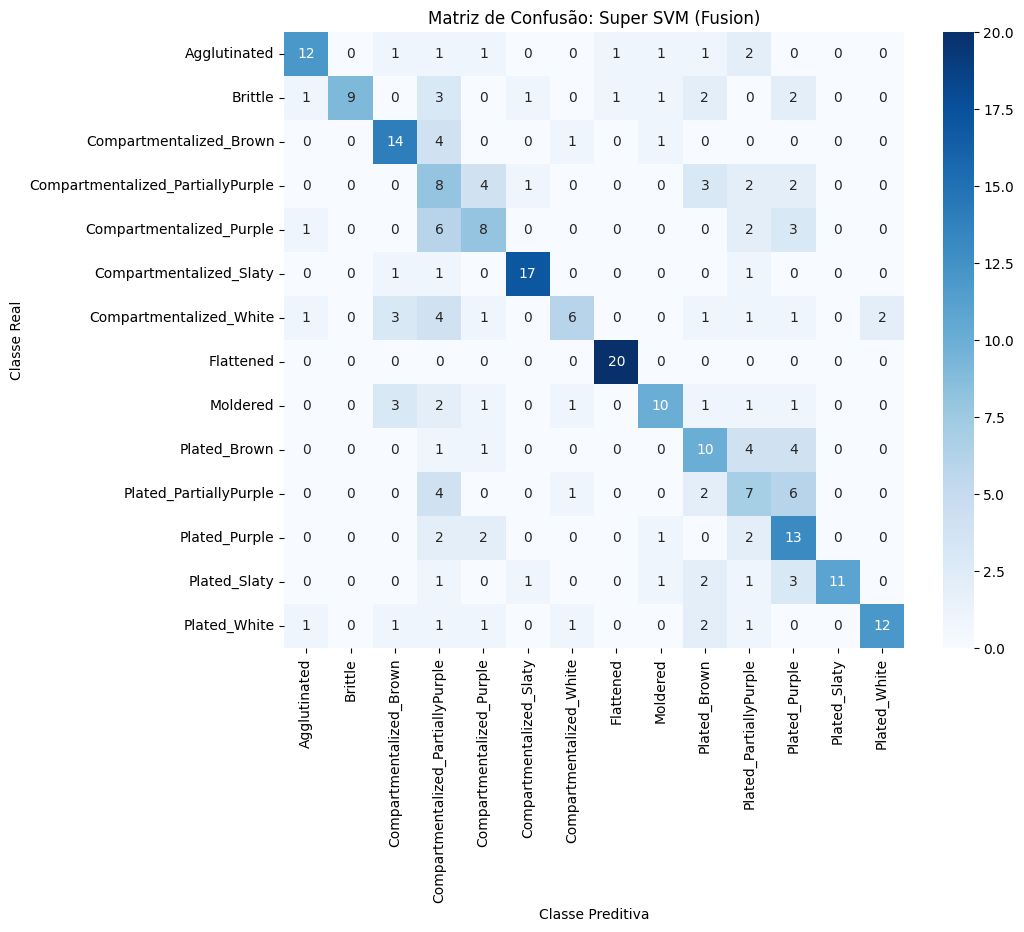

In [11]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Função para avaliar modelos e coletar métricas
def avaliar_modelo(nome, modelo, X_test, y_test, tempo_treino):
    start_time = time.time()
    y_pred = modelo.predict(X_test)
    inference_time = time.time() - start_time

    metrics = {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred, average='weighted'),
        'Revocação': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Tempo Treino (s)': tempo_treino,
        'Tempo Inferência (s)': inference_time
    }
    return metrics, y_pred

# 2. Lista para armazenar os resultados da Tabela Descritiva
resultados_finais = []

# Exemplo de uso para o modelo Fusionado (repita para VGG, Inception e EfficientNet)
# Supondo que 'grid' é o seu modelo treinado e 'tempo_fusion_treino' o tempo cronometrado
metrica_fusion, y_pred_fusion = avaliar_modelo("Fusion (VGG+Inc+Eff)", grid, X_test_pca, y_test, tempo_fusion_treino)
resultados_finais.append(metrica_fusion)

# 3. Geração da Tabela Descritiva dos Resultados
df_resultados = pd.DataFrame(resultados_finais)
print("\n--- TABELA 1: DESEMPENHO DOS MODELOS ---")
display(df_resultados.sort_values(by='Acurácia', ascending=False))

# 4. Matrizes de Confusão dos 3 Melhores Modelos
def plot_confusion_matrix(y_true, y_pred, title, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Matriz de Confusão: {title}')
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Preditiva')
    plt.show()

# Lista de classes (Santos et al., 2019) [cite: 52]
class_names = sorted(df_treino['classe'].unique())

# Plotar para o modelo Fusionado
plot_confusion_matrix(y_test, y_pred_fusion, "Super SVM (Fusion)", class_names)